In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import requests
import geojson
import json 

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [40]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/56'

params_MaytoJune_AMPeak = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_AMPeak  = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
    'excludeDates': '05-30-2022'
}

params_MaytoJune_PMPeak = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_PMPeak  = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '2,3,4',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'resolution': 'hiRes',
    'excludeDates': '05-30-2022'
}



headers = {'Authorization': Authorization,
         'Content-Type': 'application/json'}

DataFrames for JSON and GEOJSON for 5/25 - 6/24 during Peak AM Hours, inbound, Monday and Friday.
The following cells pull these two dataframes separately, and then are concatted to include the counts and 20th percentiles from the JSON df. 

In [ ]:
def concat_frames_columns(geo_response, response, date_range, time_range='6am-9am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [5]:
response_geo_MandF = requests.get(URL, params = params_geo_MaytoJune_MandF_AMPeak, headers=headers)
response_geo_MandF

<Response [200]>

In [6]:
response_MandF = requests.get(URL, params = params_MaytoJune_MandF_AMPeak, headers=headers)
response_MandF

<Response [200]>

In [7]:
route56_MaytoJune_MandF_features = response_geo_MandF.json()['features']
route56_MaytoJune_MandF_features_gdf = gpd.GeoDataFrame.from_features(route56_MaytoJune_MandF_features)
route56_MaytoJune_MandF_features_gdf



,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.890469,12.397453,8.836,2.854,2.161,1.897,1.6190,1.477,1.312,1.103
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.580158,14.952935,2.090,1.947,1.726,1.661,1.5360,1.446,1.368,1.251
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.142826,11.176362,5.338,3.066,2.648,2.210,1.8465,1.694,1.541,1.329
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.349466,7.388640,6.927,6.091,4.317,3.868,3.3750,2.426,1.402,0.787
4,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.214909,11.190076,5.980,3.220,2.502,2.215,1.9810,1.820,1.616,1.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.231507,11.027973,8.947,3.345,2.341,2.112,1.8340,1.710,1.543,1.249
747,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.794034,13.350360,2.674,2.105,1.967,1.916,1.8070,1.643,1.490,1.322
748,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.762810,14.053131,9.154,2.223,1.912,1.720,1.5250,1.394,1.266,1.095
749,"LINESTRING (-86.73936 36.20207, -86.73946 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.110229,11.349005,5.338,2.985,2.551,2.191,1.8465,1.693,1.543,1.423


In [8]:
#Monica Example
#inbound23_concat = pd.concat([inbound23_df, inbound23_df1[['countForSegment', 'percent20Secs']]], axis = 1)
#inbound23_concat

In [9]:
Route56_MaytoJune_MandF_res = response_MandF.json()
Route56_MaytoJune_MandF_df = pd.DataFrame(Route56_MaytoJune_MandF_res['data']['segments'])
Route56_MaytoJune_MandF_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.295087443684636, 'lon': -86.700831...",8.836,2.854,2.161,1.897,1.6190,1.477,1.437,1.312,1.103,23.437,1.890469,12.397453,"{'configRev': 55, 'stopPathId': 'GXIMYASF_to_G...","{'configRev': 55, 'stopPathId': 'GXIRIVEF_to_G...",147
1,"[{'lat': 36.20897531698881, 'lon': -86.7345291...",2.090,1.947,1.726,1.661,1.5360,1.446,1.425,1.368,1.251,23.628,1.580158,14.952935,"{'configRev': 55, 'stopPathId': 'GXIGREEF_to_G...","{'configRev': 55, 'stopPathId': 'GALGILSF_to_G...",19
2,"[{'lat': 36.20187189710303, 'lon': -86.7394645...",5.338,3.066,2.648,2.210,1.8465,1.694,1.631,1.541,1.329,23.949,2.142826,11.176362,"{'configRev': 55, 'stopPathId': 'GXIEHILF_to_G...","{'configRev': 55, 'stopPathId': 'GALMAYSN_to_G...",144
3,"[{'lat': 36.30031185028378, 'lon': -86.6958057...",6.927,6.091,4.317,3.868,3.3750,2.426,1.929,1.402,0.787,24.748,3.349466,7.388640,"{'configRev': 55, 'stopPathId': 'GXIRIVEF_to_G...","{'configRev': 55, 'stopPathId': 'to_GXIRIVEF',...",73
4,"[{'lat': 36.17705382045483, 'lon': -86.7544769...",5.980,3.220,2.502,2.215,1.9810,1.820,1.728,1.616,1.385,24.785,2.214909,11.190076,"{'configRev': 55, 'stopPathId': 'GXIFIVEN_to_M...","{'configRev': 55, 'stopPathId': 'GXIEASTN_to_G...",143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,"[{'lat': 36.252321102326604, 'lon': -86.717433...",8.947,3.345,2.341,2.112,1.8340,1.710,1.637,1.543,1.249,24.609,2.231507,11.027973,"{'configRev': 55, 'stopPathId': 'GALEMMSN_to_G...","{'configRev': 55, 'stopPathId': 'GXIMADLB_to_G...",148
747,"[{'lat': 36.19871719989628, 'lon': -86.7411702...",2.674,2.105,1.967,1.916,1.8070,1.643,1.575,1.490,1.322,23.951,1.794034,13.350360,"{'configRev': 55, 'stopPathId': 'GALBURSN_to_G...","{'configRev': 55, 'stopPathId': 'GXIEHILF_to_G...",145
748,"[{'lat': 36.239783325766865, 'lon': -86.723685...",9.154,2.223,1.912,1.720,1.5250,1.394,1.315,1.266,1.095,24.773,1.762810,14.053131,"{'configRev': 55, 'stopPathId': 'GALBERWF_to_G...","{'configRev': 55, 'stopPathId': 'GXIDUESN_to_G...",147
749,"[{'lat': 36.202068352980476, 'lon': -86.739355...",5.338,2.985,2.551,2.191,1.8465,1.693,1.632,1.543,1.423,23.949,2.110229,11.349005,"{'configRev': 55, 'stopPathId': 'GXIEHILF_to_G...","{'configRev': 55, 'stopPathId': 'GALMAYSN_to_G...",144


In [10]:
Route56_MaytoJune_MandF_Peak_Inbound = pd.concat(
    [route56_MaytoJune_MandF_features_gdf, 
         Route56_MaytoJune_MandF_df[['percent20Secs','countForSegment']]],axis=1
)
Route56_MaytoJune_MandF_Peak_Inbound['date range'] = Route56_MaytoJune_MandF_Peak_Inbound.apply(lambda x: '', axis=1)
Route56_MaytoJune_MandF_Peak_Inbound['date range'] = 'May 25th - June 24th 2022'
Route56_MaytoJune_MandF_Peak_Inbound['Weekdays'] = 'Monday, Friday'
Route56_MaytoJune_MandF_Peak_Inbound['Hours'] = '06:00 - 09:00'
Route56_MaytoJune_MandF_Peak_Inbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.890469,12.397453,8.836,2.854,...,1.897,1.6190,1.477,1.312,1.103,1.437,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.580158,14.952935,2.090,1.947,...,1.661,1.5360,1.446,1.368,1.251,1.425,19,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.142826,11.176362,5.338,3.066,...,2.210,1.8465,1.694,1.541,1.329,1.631,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.349466,7.388640,6.927,6.091,...,3.868,3.3750,2.426,1.402,0.787,1.929,73,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00
4,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.214909,11.190076,5.980,3.220,...,2.215,1.9810,1.820,1.616,1.385,1.728,143,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.231507,11.027973,8.947,3.345,...,2.112,1.8340,1.710,1.543,1.249,1.637,148,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00
747,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.794034,13.350360,2.674,2.105,...,1.916,1.8070,1.643,1.490,1.322,1.575,145,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00
748,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.762810,14.053131,9.154,2.223,...,1.720,1.5250,1.394,1.266,1.095,1.315,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00
749,"LINESTRING (-86.73936 36.20207, -86.73946 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.110229,11.349005,5.338,2.985,...,2.191,1.8465,1.693,1.543,1.423,1.632,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00


DataFrames for JSON and GEOJSON for 5/25 - 6/24 during Peak AM Hours, inbound, Tuesday through Thursday. The following cells pull these two dataframes separately, and then are concatted to include the counts and 20th percentiles from the JSON df.

In [11]:
response_geo_TthruTh = requests.get(URL, params = params_geo_MaytoJune_TthruTh_AMPeak, headers=headers)
response_geo_TthruTh

<Response [200]>

In [12]:
response_TthruTh = requests.get(URL, params = params_MaytoJune_TthruTh_AMPeak, headers=headers)
response_TthruTh

<Response [200]>

In [13]:
route56_MaytoJune_TthruTh_features = response_geo_TthruTh.json()['features']
route56_MaytoJune_TthruTh_features_gdf = gpd.GeoDataFrame.from_features(route56_MaytoJune_TthruTh_features)
route56_MaytoJune_TthruTh_features_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.972528,11.881707,12.943,2.959,2.451,2.038,1.6915,1.498,1.318,1.158
1,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.194008,10.915639,10.332,3.096,2.513,2.207,1.9390,1.765,1.552,1.300
2,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.250512,7.613570,9.466,5.689,4.608,3.816,2.9620,2.127,1.377,0.569
3,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.141588,7.600615,14.515,4.768,3.557,3.178,2.6920,2.317,1.943,1.420
4,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.211044,11.209637,7.284,3.107,2.369,2.178,1.9710,1.779,1.586,1.302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.538806,9.693139,32.748,3.801,2.748,2.320,1.9215,1.697,1.484,1.265
729,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.847008,12.967459,4.350,2.200,2.038,1.953,1.7920,1.663,1.528,1.229
730,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.721953,14.386572,8.797,2.146,1.878,1.702,1.5380,1.385,1.238,1.086
731,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.224298,4.570566,16.031,7.541,6.207,5.546,4.7935,4.100,3.401,2.547


In [14]:
Route56_MaytoJune_TthruTh_res = response_TthruTh.json()
Route56_MaytoJune_TthruTh_df = pd.DataFrame(Route56_MaytoJune_TthruTh_res['data']['segments'])
Route56_MaytoJune_TthruTh_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.295087443684636, 'lon': -86.700831...",12.943,2.959,2.451,2.038,1.6915,1.498,1.419,1.318,1.158,23.437,1.972528,11.881707,"{'configRev': 55, 'stopPathId': 'GXIMYASF_to_G...","{'configRev': 55, 'stopPathId': 'GXIRIVEF_to_G...",248
1,"[{'lat': 36.20187189710303, 'lon': -86.7394645...",10.332,3.096,2.513,2.207,1.9390,1.765,1.680,1.552,1.300,23.949,2.194008,10.915639,"{'configRev': 55, 'stopPathId': 'GXIEHILF_to_G...","{'configRev': 55, 'stopPathId': 'GALMAYSN_to_G...",246
2,"[{'lat': 36.30031185028378, 'lon': -86.6958057...",9.466,5.689,4.608,3.816,2.9620,2.127,1.801,1.377,0.569,24.748,3.250512,7.613570,"{'configRev': 55, 'stopPathId': 'GXIRIVEF_to_G...","{'configRev': 55, 'stopPathId': 'to_GXIRIVEF',...",129
3,"[{'lat': 36.16773051060538, 'lon': -86.7785875...",14.515,4.768,3.557,3.178,2.6920,2.317,2.183,1.943,1.420,23.878,3.141588,7.600615,"{'configRev': 55, 'stopPathId': 'JAMGAYWF_to_M...","{'configRev': 55, 'stopPathId': 'MAI5STWN_to_J...",250
4,"[{'lat': 36.17705382045483, 'lon': -86.7544769...",7.284,3.107,2.369,2.178,1.9710,1.779,1.705,1.586,1.302,24.785,2.211044,11.209637,"{'configRev': 55, 'stopPathId': 'GXIFIVEN_to_M...","{'configRev': 55, 'stopPathId': 'GXIEASTN_to_G...",249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,"[{'lat': 36.252321102326604, 'lon': -86.717433...",32.748,3.801,2.748,2.320,1.9215,1.697,1.598,1.484,1.265,24.609,2.538806,9.693139,"{'configRev': 55, 'stopPathId': 'GALEMMSN_to_G...","{'configRev': 55, 'stopPathId': 'GXIMADLB_to_G...",258
729,"[{'lat': 36.19871719989628, 'lon': -86.7411702...",4.350,2.200,2.038,1.953,1.7920,1.663,1.605,1.528,1.229,23.951,1.847008,12.967459,"{'configRev': 55, 'stopPathId': 'GALBURSN_to_G...","{'configRev': 55, 'stopPathId': 'GXIEHILF_to_G...",244
730,"[{'lat': 36.239783325766865, 'lon': -86.723685...",8.797,2.146,1.878,1.702,1.5380,1.385,1.333,1.238,1.086,24.773,1.721953,14.386572,"{'configRev': 55, 'stopPathId': 'GALBERWF_to_G...","{'configRev': 55, 'stopPathId': 'GXIDUESN_to_G...",255
731,"[{'lat': 36.16721496399264, 'lon': -86.7811923...",16.031,7.541,6.207,5.546,4.7935,4.100,3.763,3.401,2.547,23.878,5.224298,4.570566,"{'configRev': 55, 'stopPathId': 'JAMGAYWF_to_M...","{'configRev': 55, 'stopPathId': 'MAI5STWN_to_J...",238


In [15]:
Route56_MaytoJune_TthruTh_Peak_Inbound = pd.concat(
    [route56_MaytoJune_TthruTh_features_gdf, 
         Route56_MaytoJune_TthruTh_df[['percent20Secs','countForSegment']]],axis=1
)
Route56_MaytoJune_TthruTh_Peak_Inbound['date range'] = Route56_MaytoJune_TthruTh_Peak_Inbound.apply(lambda x: '', axis=1)
Route56_MaytoJune_TthruTh_Peak_Inbound['date range'] = 'May 25th - June 24th 2022'
Route56_MaytoJune_TthruTh_Peak_Inbound['Weekdays'] = 'Tuesday, Wednesday, Thursday'
Route56_MaytoJune_TthruTh_Peak_Inbound['Hours'] = '06:00 - 09:00'
Route56_MaytoJune_TthruTh_Peak_Inbound


,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.972528,11.881707,12.943,2.959,...,2.038,1.6915,1.498,1.318,1.158,1.419,248,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00
1,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.194008,10.915639,10.332,3.096,...,2.207,1.9390,1.765,1.552,1.300,1.680,246,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00
2,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.250512,7.613570,9.466,5.689,...,3.816,2.9620,2.127,1.377,0.569,1.801,129,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00
3,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.141588,7.600615,14.515,4.768,...,3.178,2.6920,2.317,1.943,1.420,2.183,250,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00
4,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.211044,11.209637,7.284,3.107,...,2.178,1.9710,1.779,1.586,1.302,1.705,249,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.538806,9.693139,32.748,3.801,...,2.320,1.9215,1.697,1.484,1.265,1.598,258,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00
729,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.847008,12.967459,4.350,2.200,...,1.953,1.7920,1.663,1.528,1.229,1.605,244,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00
730,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.721953,14.386572,8.797,2.146,...,1.702,1.5380,1.385,1.238,1.086,1.333,255,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00
731,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.224298,4.570566,16.031,7.541,...,5.546,4.7935,4.100,3.401,2.547,3.763,238,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00


In [16]:
Route56_MaytoJune_Inbound_Peak_AM = pd.concat([Route56_MaytoJune_MandF_Peak_Inbound, 
         Route56_MaytoJune_TthruTh_Peak_Inbound])
Route56_MaytoJune_Inbound_Peak_AM['direction'] = 'inbound'
Route56_MaytoJune_Inbound_Peak_AM

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.890469,12.397453,8.836,2.854,...,1.6190,1.477,1.312,1.103,1.437,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.580158,14.952935,2.090,1.947,...,1.5360,1.446,1.368,1.251,1.425,19,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.142826,11.176362,5.338,3.066,...,1.8465,1.694,1.541,1.329,1.631,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.349466,7.388640,6.927,6.091,...,3.3750,2.426,1.402,0.787,1.929,73,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
4,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.214909,11.190076,5.980,3.220,...,1.9810,1.820,1.616,1.385,1.728,143,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.538806,9.693139,32.748,3.801,...,1.9215,1.697,1.484,1.265,1.598,258,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
729,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.847008,12.967459,4.350,2.200,...,1.7920,1.663,1.528,1.229,1.605,244,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
730,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.721953,14.386572,8.797,2.146,...,1.5380,1.385,1.238,1.086,1.333,255,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
731,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.224298,4.570566,16.031,7.541,...,4.7935,4.100,3.401,2.547,3.763,238,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound


In [17]:
Route56InboundStopCount = Route56_MaytoJune_Inbound_Peak_AM['countForSegment'].max()
Route56_MaytoJune_Inbound_Trimmed = Route56_MaytoJune_Inbound_Peak_AM[Route56_MaytoJune_Inbound_Peak_AM['countForSegment']> Route56InboundStopCount/2]
Route56_MaytoJune_Inbound_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.890469,12.397453,8.836,2.854,...,1.6190,1.477,1.312,1.103,1.437,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.142826,11.176362,5.338,3.066,...,1.8465,1.694,1.541,1.329,1.631,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
4,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.214909,11.190076,5.980,3.220,...,1.9810,1.820,1.616,1.385,1.728,143,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
5,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.074486,7.766501,15.129,4.690,...,2.5250,2.228,1.849,1.249,2.097,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
6,"LINESTRING (-86.71419 36.25677, -86.71426 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,5.648463,4.230354,37.604,11.156,...,3.9800,2.959,2.018,1.356,2.414,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.538806,9.693139,32.748,3.801,...,1.9215,1.697,1.484,1.265,1.598,258,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
729,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.847008,12.967459,4.350,2.200,...,1.7920,1.663,1.528,1.229,1.605,244,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
730,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.721953,14.386572,8.797,2.146,...,1.5380,1.385,1.238,1.086,1.333,255,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
731,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.224298,4.570566,16.031,7.541,...,4.7935,4.100,3.401,2.547,3.763,238,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound


In [18]:
Route56_MaytoJune_Inbound_Trimmed.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,24.353474,3.014547,11.651580,23.232757,5.543128,3.745709,2.913278,2.137407,1.782096,1.489154,1.178586,1.646692,198.500000
std,0.440681,5.574311,4.142555,59.964687,13.146100,8.877597,6.947946,3.833592,2.090770,0.562894,0.207922,1.410621,52.534895
min,22.655000,1.299865,0.208790,1.812000,1.480000,1.402000,1.344000,1.258000,1.184000,1.079000,0.569000,1.149000,130.000000
25%,23.971000,1.673863,9.370432,3.654750,2.032250,1.821250,1.701250,1.544500,1.427000,1.291000,1.070000,1.367000,145.000000
50%,24.524000,1.978559,12.278221,6.524000,2.618000,2.192000,1.978000,1.752500,1.597000,1.437500,1.165500,1.531000,235.000000
75%,24.685000,2.601955,14.641426,15.999000,4.149750,3.004500,2.472750,2.009875,1.790000,1.564750,1.290000,1.681750,251.000000
max,24.913000,114.445189,18.924273,991.595000,249.864000,189.864000,160.334000,85.980000,46.260000,14.979000,2.580000,33.708000,259.000000


In [19]:
Weekday_average_inbound_travelspeeds = Route56_MaytoJune_Inbound_Trimmed.groupby(
                                ['fromStopId','Weekdays'])['averageTravelSpeed'].mean().to_frame()
Weekday_average_inbound_travelspeeds = Weekday_average_inbound_travelspeeds.reset_index()
Weekday_average_inbound_travelspeeds.sort_values(by='averageTravelSpeed')

,fromStopId,Weekdays,averageTravelSpeed
58,JAMGAYWF,"Tuesday, Wednesday, Thursday",4.445030
57,JAMGAYWF,"Monday, Friday",5.245475
29,GALOLDSN,"Tuesday, Wednesday, Thursday",6.010054
28,GALOLDSN,"Monday, Friday",6.070490
37,GXIDUESN,"Tuesday, Wednesday, Thursday",7.640877
...,...,...,...
2,GALBERWF,"Monday, Friday",14.605377
25,GALMONSN,"Tuesday, Wednesday, Thursday",15.432364
1,GALALLSN,"Tuesday, Wednesday, Thursday",15.524005
0,GALALLSN,"Monday, Friday",15.552356


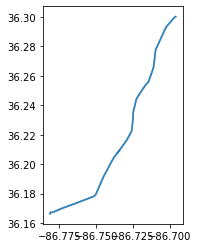

In [20]:
Route56_MaytoJune_Inbound_Peak_AM.plot();

In [21]:
params_MaytoJune_MandF_PMPeak = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,5',
    'resolution': 'hiRes',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_MandF_PMPeak  = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,5',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'resolution': 'hiRes',
    'excludeDates': '05-30-2022'
}

params_MaytoJune_TthruTh_PMPeak = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '2,3,4',
    'resolution': 'hiRes',
   'beginTime' : '14:30',
    'endTime' : '18:00',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_TthruTh_PMPeak  = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '2,3,4',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'resolution': 'hiRes',
    'excludeDates': '05-30-2022'
}

In [22]:
response_geo_MandF_PM = requests.get(URL, params = params_geo_MaytoJune_MandF_PMPeak, headers=headers)
response_geo_MandF_PM

<Response [200]>

In [23]:
response_MandF_PM = requests.get(URL, params = params_MaytoJune_MandF_PMPeak, headers=headers)
response_MandF_PM

<Response [200]>

In [24]:
route56_MaytoJune_MandF_PM_features = response_geo_MandF_PM.json()['features']
route56_MaytoJune_MandF_PM_features_gdf = gpd.GeoDataFrame.from_features(route56_MaytoJune_MandF_PM_features)
route56_MaytoJune_MandF_PM_features_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.008055,8.108229,32.521,5.761,3.673,2.633,1.7740,1.555,1.297,1.167
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.959579,12.671599,7.187,2.720,2.065,1.886,1.7135,1.606,1.457,1.372
2,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,8.126349,3.074320,108.724,22.964,12.916,6.875,2.0830,1.552,1.376,1.226
3,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.752787,8.893169,33.835,4.058,2.939,2.495,2.1475,1.922,1.604,0.750
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.784970,8.878372,5.875,4.458,3.714,3.150,2.3905,2.074,1.725,1.307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.713739,6.618128,34.650,6.426,3.999,2.968,2.4950,2.183,1.891,1.592
835,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.404190,10.249606,13.913,3.719,2.579,2.214,1.9940,1.836,1.578,1.307
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.507030,4.442140,37.386,15.514,4.723,2.869,1.9795,1.775,1.526,1.232
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,2.007739,12.000066,4.122,2.984,2.347,2.139,1.8290,1.663,1.413,1.179


In [25]:
Route56_MaytoJune_MandF_PM_res = response_MandF_PM.json()
Route56_MaytoJune_MandF_PM_df = pd.DataFrame(Route56_MaytoJune_MandF_PM_res['data']['segments'])
Route56_MaytoJune_MandF_PM_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.293003197615, 'lon': -86.702390347...",32.521,5.761,3.673,2.633,1.7740,1.555,1.420,1.297,1.167,24.390,3.008055,8.108229,"{'configRev': 55, 'stopPathId': 'GALEDENN_to_G...","{'configRev': 55, 'stopPathId': 'GXOEDGEF_to_G...",165
1,"[{'lat': 36.22324147726892, 'lon': -86.7256603...",7.187,2.720,2.065,1.886,1.7135,1.606,1.542,1.457,1.372,24.831,1.959579,12.671599,"{'configRev': 55, 'stopPathId': 'GALARDNN_to_G...","{'configRev': 55, 'stopPathId': 'GALGILNF_to_G...",164
2,"[{'lat': 36.23862, 'lon': -86.72381}, {'lat': ...",108.724,22.964,12.916,6.875,2.0830,1.552,1.487,1.376,1.226,24.983,8.126349,3.074320,"{'configRev': 55, 'stopPathId': 'GXOWALTF_to_G...","{'configRev': 55, 'stopPathId': 'GALBRONN_to_G...",169
3,"[{'lat': 36.30561413622722, 'lon': -86.6876925...",33.835,4.058,2.939,2.495,2.1475,1.922,1.813,1.604,0.750,24.481,2.752787,8.893169,"{'configRev': 55, 'stopPathId': 'GALWMRT_to_GA...","{'configRev': 55, 'stopPathId': 'GALCONNN_to_G...",164
4,"[{'lat': 36.172897801020945, 'lon': -86.765081...",5.875,4.458,3.714,3.150,2.3905,2.074,1.956,1.725,1.307,24.726,2.784970,8.878372,"{'configRev': 55, 'stopPathId': 'JAM2AEF_to_MA...","{'configRev': 55, 'stopPathId': 'MCC4_18_to_JA...",166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"[{'lat': 36.201995265543815, 'lon': -86.739295...",34.650,6.426,3.999,2.968,2.4950,2.183,2.055,1.891,1.592,24.578,3.713739,6.618128,"{'configRev': 55, 'stopPathId': 'GALBURNN_to_G...","{'configRev': 55, 'stopPathId': 'GALCARNF_to_G...",165
835,"[{'lat': 36.30249, 'lon': -86.69228}, {'lat': ...",13.913,3.719,2.579,2.214,1.9940,1.836,1.711,1.578,1.307,24.642,2.404190,10.249606,"{'configRev': 55, 'stopPathId': 'GALCONSF_to_G...","{'configRev': 55, 'stopPathId': 'GALWMRT_to_GA...",163
836,"[{'lat': 36.23078159255923, 'lon': -86.7249317...",37.386,15.514,4.723,2.869,1.9795,1.775,1.667,1.526,1.232,24.463,5.507030,4.442140,"{'configRev': 55, 'stopPathId': 'GALBRONN_to_G...","{'configRev': 55, 'stopPathId': 'GXOINGLN_to_G...",166
837,"[{'lat': 36.265186571263655, 'lon': -86.711133...",4.122,2.984,2.347,2.139,1.8290,1.663,1.568,1.413,1.179,24.093,2.007739,12.000066,"{'configRev': 55, 'stopPathId': 'GALOLDNM_to_G...","{'configRev': 55, 'stopPathId': 'GALMAPNF_to_G...",161


In [26]:
Route56_MaytoJune_MandF_PMPeak_Outbound = pd.concat(
    [route56_MaytoJune_MandF_PM_features_gdf, 
         Route56_MaytoJune_MandF_PM_df[['percent20Secs','countForSegment']]],axis=1
)

Route56_MaytoJune_MandF_PMPeak_Outbound['date range'] = 'May 25th - June 24th 2022'
Route56_MaytoJune_MandF_PMPeak_Outbound['Weekdays'] = 'Monday, Friday'
Route56_MaytoJune_MandF_PMPeak_Outbound['Hours'] = '14:30 - 18:00'
Route56_MaytoJune_MandF_PMPeak_Outbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.008055,8.108229,32.521,5.761,...,2.633,1.7740,1.555,1.297,1.167,1.420,165,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.959579,12.671599,7.187,2.720,...,1.886,1.7135,1.606,1.457,1.372,1.542,164,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00
2,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,8.126349,3.074320,108.724,22.964,...,6.875,2.0830,1.552,1.376,1.226,1.487,169,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00
3,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.752787,8.893169,33.835,4.058,...,2.495,2.1475,1.922,1.604,0.750,1.813,164,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.784970,8.878372,5.875,4.458,...,3.150,2.3905,2.074,1.725,1.307,1.956,166,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.713739,6.618128,34.650,6.426,...,2.968,2.4950,2.183,1.891,1.592,2.055,165,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00
835,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.404190,10.249606,13.913,3.719,...,2.214,1.9940,1.836,1.578,1.307,1.711,163,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.507030,4.442140,37.386,15.514,...,2.869,1.9795,1.775,1.526,1.232,1.667,166,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,2.007739,12.000066,4.122,2.984,...,2.139,1.8290,1.663,1.413,1.179,1.568,161,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00


In [27]:
response_geo_TthruTh_PM = requests.get(URL, params = params_geo_MaytoJune_TthruTh_PMPeak, headers=headers)
response_geo_TthruTh_PM

<Response [200]>

In [28]:
response_TthruTh_PM = requests.get(URL, params = params_MaytoJune_TthruTh_PMPeak, headers=headers)
response_TthruTh_PM

<Response [200]>

In [29]:
route56_MaytoJune_TthruTh_PM_features = response_geo_TthruTh_PM.json()['features']
route56_MaytoJune_TthruTh_PM_features_gdf = gpd.GeoDataFrame.from_features(route56_MaytoJune_TthruTh_PM_features)
route56_MaytoJune_TthruTh_PM_features_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.730377,6.538213,46.773,6.031,4.424,2.989,2.0510,1.691,1.453,1.213
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,2.111855,11.757910,8.157,3.041,2.433,2.052,1.7575,1.625,1.500,1.203
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.454610,9.973478,7.884,3.928,2.771,2.471,2.1040,1.887,1.623,1.315
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,7.829496,3.190882,76.996,22.770,12.560,6.822,2.0765,1.597,1.393,1.212
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.630834,9.398541,7.869,4.114,3.305,2.918,2.3570,2.007,1.745,1.374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.457576,10.026953,15.375,3.595,2.760,2.439,2.0720,1.851,1.534,1.264
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.186335,7.713564,27.875,5.089,3.232,2.810,2.4150,2.127,1.842,1.490
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.556655,4.402469,51.885,17.261,5.258,2.856,2.0100,1.791,1.518,1.290
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.940320,12.417024,3.945,2.646,2.276,2.049,1.8000,1.624,1.472,1.254


In [30]:
Route56_MaytoJune_TthruTh_PM_res = response_TthruTh_PM.json()
Route56_MaytoJune_TthruTh_PM_df = pd.DataFrame(Route56_MaytoJune_TthruTh_PM_res['data']['segments'])
Route56_MaytoJune_TthruTh_PM_df

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.293003197615, 'lon': -86.702390347...",46.773,6.031,4.424,2.989,2.0510,1.691,1.569,1.453,1.213,24.390,3.730377,6.538213,"{'configRev': 55, 'stopPathId': 'GALEDENN_to_G...","{'configRev': 55, 'stopPathId': 'GXOEDGEF_to_G...",281
1,"[{'lat': 36.22324147726892, 'lon': -86.7256603...",8.157,3.041,2.433,2.052,1.7575,1.625,1.563,1.500,1.203,24.831,2.111855,11.757910,"{'configRev': 55, 'stopPathId': 'GALARDNN_to_G...","{'configRev': 55, 'stopPathId': 'GALGILNF_to_G...",282
2,"[{'lat': 36.30561413622722, 'lon': -86.6876925...",7.884,3.928,2.771,2.471,2.1040,1.887,1.791,1.623,1.315,24.481,2.454610,9.973478,"{'configRev': 55, 'stopPathId': 'GALWMRT_to_GA...","{'configRev': 55, 'stopPathId': 'GALCONNN_to_G...",282
3,"[{'lat': 36.23862, 'lon': -86.72381}, {'lat': ...",76.996,22.770,12.560,6.822,2.0765,1.597,1.477,1.393,1.212,24.983,7.829496,3.190882,"{'configRev': 55, 'stopPathId': 'GXOWALTF_to_G...","{'configRev': 55, 'stopPathId': 'GALBRONN_to_G...",284
4,"[{'lat': 36.172897801020945, 'lon': -86.765081...",7.869,4.114,3.305,2.918,2.3570,2.007,1.868,1.745,1.374,24.726,2.630834,9.398541,"{'configRev': 55, 'stopPathId': 'JAM2AEF_to_MA...","{'configRev': 55, 'stopPathId': 'MCC4_18_to_JA...",289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"[{'lat': 36.30249, 'lon': -86.69228}, {'lat': ...",15.375,3.595,2.760,2.439,2.0720,1.851,1.724,1.534,1.264,24.642,2.457576,10.026953,"{'configRev': 55, 'stopPathId': 'GALCONSF_to_G...","{'configRev': 55, 'stopPathId': 'GALWMRT_to_GA...",283
835,"[{'lat': 36.201995265543815, 'lon': -86.739295...",27.875,5.089,3.232,2.810,2.4150,2.127,1.997,1.842,1.490,24.578,3.186335,7.713564,"{'configRev': 55, 'stopPathId': 'GALBURNN_to_G...","{'configRev': 55, 'stopPathId': 'GALCARNF_to_G...",284
836,"[{'lat': 36.23078159255923, 'lon': -86.7249317...",51.885,17.261,5.258,2.856,2.0100,1.791,1.663,1.518,1.290,24.463,5.556655,4.402469,"{'configRev': 55, 'stopPathId': 'GALBRONN_to_G...","{'configRev': 55, 'stopPathId': 'GXOINGLN_to_G...",287
837,"[{'lat': 36.265186571263655, 'lon': -86.711133...",3.945,2.646,2.276,2.049,1.8000,1.624,1.555,1.472,1.254,24.093,1.940320,12.417024,"{'configRev': 55, 'stopPathId': 'GALOLDNM_to_G...","{'configRev': 55, 'stopPathId': 'GALMAPNF_to_G...",278


In [31]:
Route56_MaytoJune_TthruTh_PMPeak_Outbound = pd.concat(
    [route56_MaytoJune_TthruTh_PM_features_gdf, 
         Route56_MaytoJune_TthruTh_PM_df[['percent20Secs','countForSegment']]],axis=1
)

Route56_MaytoJune_TthruTh_PMPeak_Outbound['date range'] = 'May 25th - June 24th 2022'
Route56_MaytoJune_TthruTh_PMPeak_Outbound['Weekdays'] = 'Tuesday, Wednesday, Thursday'
Route56_MaytoJune_TthruTh_PMPeak_Outbound['Hours'] = '14:30 - 18:00'
Route56_MaytoJune_TthruTh_PMPeak_Outbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.730377,6.538213,46.773,6.031,...,2.989,2.0510,1.691,1.453,1.213,1.569,281,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,2.111855,11.757910,8.157,3.041,...,2.052,1.7575,1.625,1.500,1.203,1.563,282,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.454610,9.973478,7.884,3.928,...,2.471,2.1040,1.887,1.623,1.315,1.791,282,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,7.829496,3.190882,76.996,22.770,...,6.822,2.0765,1.597,1.393,1.212,1.477,284,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.630834,9.398541,7.869,4.114,...,2.918,2.3570,2.007,1.745,1.374,1.868,289,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.457576,10.026953,15.375,3.595,...,2.439,2.0720,1.851,1.534,1.264,1.724,283,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.186335,7.713564,27.875,5.089,...,2.810,2.4150,2.127,1.842,1.490,1.997,284,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.556655,4.402469,51.885,17.261,...,2.856,2.0100,1.791,1.518,1.290,1.663,287,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.940320,12.417024,3.945,2.646,...,2.049,1.8000,1.624,1.472,1.254,1.555,278,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00


In [32]:
Route56_MaytoJune_Outbound_Peak_PM = pd.concat([Route56_MaytoJune_MandF_PMPeak_Outbound, 
         Route56_MaytoJune_TthruTh_PMPeak_Outbound])
Route56_MaytoJune_Outbound_Peak_PM['direction'] = 'outbound'
Route56_MaytoJune_Outbound_Peak_PM

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.008055,8.108229,32.521,5.761,...,1.7740,1.555,1.297,1.167,1.420,165,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.959579,12.671599,7.187,2.720,...,1.7135,1.606,1.457,1.372,1.542,164,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
2,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,8.126349,3.074320,108.724,22.964,...,2.0830,1.552,1.376,1.226,1.487,169,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
3,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.752787,8.893169,33.835,4.058,...,2.1475,1.922,1.604,0.750,1.813,164,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.784970,8.878372,5.875,4.458,...,2.3905,2.074,1.725,1.307,1.956,166,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.457576,10.026953,15.375,3.595,...,2.0720,1.851,1.534,1.264,1.724,283,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.186335,7.713564,27.875,5.089,...,2.4150,2.127,1.842,1.490,1.997,284,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.556655,4.402469,51.885,17.261,...,2.0100,1.791,1.518,1.290,1.663,287,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.940320,12.417024,3.945,2.646,...,1.8000,1.624,1.472,1.254,1.555,278,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound


In [33]:
Route56OutboundStopCount = Route56_MaytoJune_Outbound_Peak_PM['countForSegment'].max()
Route56_MaytoJune_Outbound_Trimmed = Route56_MaytoJune_Outbound_Peak_PM[Route56_MaytoJune_Outbound_Peak_PM['countForSegment']> Route56OutboundStopCount/2]
Route56_MaytoJune_Outbound_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.008055,8.108229,32.521,5.761,...,1.7740,1.555,1.297,1.167,1.420,165,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.959579,12.671599,7.187,2.720,...,1.7135,1.606,1.457,1.372,1.542,164,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
2,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,8.126349,3.074320,108.724,22.964,...,2.0830,1.552,1.376,1.226,1.487,169,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
3,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.752787,8.893169,33.835,4.058,...,2.1475,1.922,1.604,0.750,1.813,164,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.784970,8.878372,5.875,4.458,...,2.3905,2.074,1.725,1.307,1.956,166,May 25th - June 24th 2022,"Monday, Friday",14:30 - 18:00,outbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.457576,10.026953,15.375,3.595,...,2.0720,1.851,1.534,1.264,1.724,283,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.186335,7.713564,27.875,5.089,...,2.4150,2.127,1.842,1.490,1.997,284,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.556655,4.402469,51.885,17.261,...,2.0100,1.791,1.518,1.290,1.663,287,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.940320,12.417024,3.945,2.646,...,1.8000,1.624,1.472,1.254,1.555,278,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound


In [34]:
Route56_MaytoJune_Outbound_Trimmed.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000
mean,24.510208,3.930512,9.650364,35.870650,7.490026,4.777770,3.696513,2.692486,2.117968,1.654753,1.241498,1.857101,223.758827
std,0.468333,8.943318,4.276208,77.506693,18.718757,14.199523,11.988057,8.539741,4.076570,0.591628,0.267719,1.243632,59.442428
min,22.819000,1.324030,0.076507,1.869000,1.518000,1.426000,1.380000,1.318000,1.226000,1.121000,0.750000,1.176000,156.000000
25%,24.390000,1.881745,6.170368,5.842000,2.444500,2.064500,1.867000,1.679000,1.552000,1.374500,1.084000,1.474000,164.000000
50%,24.627000,2.447175,9.973500,12.837000,3.677000,2.740000,2.353000,2.002500,1.766000,1.531000,1.224000,1.658000,252.000000
75%,24.848000,3.928499,13.061762,40.775500,6.789000,4.484500,3.513500,2.560750,2.124000,1.792000,1.384000,1.958500,283.000000
max,24.984000,322.089208,18.736736,1493.132000,593.979000,514.894000,461.020000,339.631000,160.262000,10.634000,4.217000,36.610000,302.000000


In [35]:
Weekday_average_outbound_travelspeeds = Route56_MaytoJune_Outbound_Trimmed.groupby(
                                ['fromStopId','Weekdays'])['averageTravelSpeed'].mean().to_frame()
Weekday_average_outbound_travelspeeds = Weekday_average_outbound_travelspeeds.reset_index()
Weekday_average_outbound_travelspeeds.sort_values(by='averageTravelSpeed')

,fromStopId,Weekdays,averageTravelSpeed
56,GXOMADWG,"Monday, Friday",4.124811
57,GXOMADWG,"Tuesday, Wednesday, Thursday",4.622942
6,GALBERNN,"Monday, Friday",4.778853
61,GXORIVEN,"Tuesday, Wednesday, Thursday",4.865751
71,MCC4_18,"Tuesday, Wednesday, Thursday",4.904185
...,...,...,...
19,GALEDENN,"Tuesday, Wednesday, Thursday",13.197851
2,GALANDNF,"Monday, Friday",13.273093
18,GALEDENN,"Monday, Friday",14.411074
47,GXOEDGEF,"Tuesday, Wednesday, Thursday",15.281384


In [36]:
Route56_MaytoJune_Weekdays = pd.concat([Route56_MaytoJune_Inbound_Trimmed, 
         Route56_MaytoJune_Outbound_Trimmed])
Route56_MaytoJune_Weekdays

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.890469,12.397453,8.836,2.854,...,1.6190,1.477,1.312,1.103,1.437,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.142826,11.176362,5.338,3.066,...,1.8465,1.694,1.541,1.329,1.631,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
4,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.214909,11.190076,5.980,3.220,...,1.9810,1.820,1.616,1.385,1.728,143,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
5,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.074486,7.766501,15.129,4.690,...,2.5250,2.228,1.849,1.249,2.097,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
6,"LINESTRING (-86.71419 36.25677, -86.71426 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,5.648463,4.230354,37.604,11.156,...,3.9800,2.959,2.018,1.356,2.414,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.457576,10.026953,15.375,3.595,...,2.0720,1.851,1.534,1.264,1.724,283,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.186335,7.713564,27.875,5.089,...,2.4150,2.127,1.842,1.490,1.997,284,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.556655,4.402469,51.885,17.261,...,2.0100,1.791,1.518,1.290,1.663,287,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.940320,12.417024,3.945,2.646,...,1.8000,1.624,1.472,1.254,1.555,278,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",14:30 - 18:00,outbound


In [37]:
Route56_MaytoJune_Weekdays_Inbound = Route56_MaytoJune_Weekdays[Route56_MaytoJune_Weekdays['direction']=='inbound']
Route56_MaytoJune_Weekdays_Inbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.890469,12.397453,8.836,2.854,...,1.6190,1.477,1.312,1.103,1.437,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.142826,11.176362,5.338,3.066,...,1.8465,1.694,1.541,1.329,1.631,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
4,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.214909,11.190076,5.980,3.220,...,1.9810,1.820,1.616,1.385,1.728,143,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
5,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.074486,7.766501,15.129,4.690,...,2.5250,2.228,1.849,1.249,2.097,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
6,"LINESTRING (-86.71419 36.25677, -86.71426 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,5.648463,4.230354,37.604,11.156,...,3.9800,2.959,2.018,1.356,2.414,147,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.538806,9.693139,32.748,3.801,...,1.9215,1.697,1.484,1.265,1.598,258,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
729,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.847008,12.967459,4.350,2.200,...,1.7920,1.663,1.528,1.229,1.605,244,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
730,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.721953,14.386572,8.797,2.146,...,1.5380,1.385,1.238,1.086,1.333,255,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
731,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.224298,4.570566,16.031,7.541,...,4.7935,4.100,3.401,2.547,3.763,238,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound


In [38]:
Route56_MaytoJune_Weekdays_Inbound_q80 = (Route56_MaytoJune_Weekdays_Inbound[
    Route56_MaytoJune_Weekdays_Inbound['percent20Secs']> 
    Route56_MaytoJune_Weekdays_Inbound['percent20Secs'].quantile(q=0.8)])
Route56_MaytoJune_Weekdays_Inbound_q80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,97.895895,0.243912,991.595,154.687,...,80.5320,46.260,14.979,2.363,33.708,200,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
1,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,111.204193,0.214875,472.867,243.720,...,81.1250,45.492,12.089,1.526,29.097,249,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
2,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,114.445189,0.208790,444.735,249.864,...,85.9800,44.683,6.279,1.404,28.700,143,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
3,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,28.429209,0.839911,795.453,29.183,...,20.0020,15.892,5.708,2.363,13.516,215,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
4,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,11.920633,2.003082,38.164,18.592,...,11.8700,8.586,4.323,2.363,6.521,215,May 25th - June 24th 2022,"Tuesday, Wednesday, Thursday",06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,"LINESTRING (-86.75752 36.17588, -86.75777 36.1...",GXI7AVEN,Main Street Station Inbound,MAI5STWN,Main St & 5th St Wb,24.565,4.419051,5.558886,54.579,8.561,...,2.7520,1.879,1.600,0.660,1.725,137,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
281,"LINESTRING (-86.76344 36.17358, -86.76369 36.1...",GXI7AVEN,Main Street Station Inbound,MAI5STWN,Main St & 5th St Wb,24.565,2.044131,12.017332,5.793,2.393,...,1.9760,1.844,1.627,1.385,1.724,145,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
282,"LINESTRING (-86.74991 36.18025, -86.74999 36.1...",GXIEASTN,Eastland Station Inbound,GXIFIVEN,Five Points Station Inbound,23.743,2.545403,9.327796,6.675,4.052,...,2.1430,1.835,1.597,1.380,1.723,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound
283,"LINESTRING (-86.75398 36.17725, -86.75423 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,1.958951,12.652180,4.239,2.351,...,1.9240,1.790,1.607,1.385,1.723,144,May 25th - June 24th 2022,"Monday, Friday",06:00 - 09:00,inbound


<AxesSubplot:>

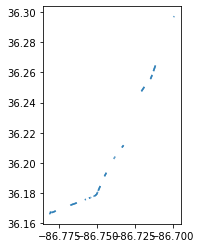

In [39]:
Route56_MaytoJune_Weekdays_Inbound_q80.plot()